# 03-Extension to the WCS core: Web Coverage Processing Service

<a href="./02-WCS_core_requests.ipynb"><< 02-WCS core requests</a>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space> <a href="./04-WCS_access.ipynb">04-How to develop and test WCS queries?>></a>

This tutorial is a practical introduction into the Web Coverage Processing Service.  
Examples include:
- [Basic WCPS request](#basic_wcps)
- [Mathematical operations with WCPS](#maths_wcps)
- [On-the-fly color-scheme application with WCPS](#colouring_wcps)
    

***

## Web Coverage Processing Service (WCPS) requests

The [previous tutorial](./02-WCS_core_requests.ipynb) explained the principal setup of WCS requests. A Web Coverage Processing Service (WCPS) is an extension of the WCS core suite. A WCPS has the same setup as a WCS and consists of three components:
* Service endpoint,
* request type and
* query parameter.


 
> **Service endpoint with service description** remained unchanged:  
<font color="blue">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1</font>

> **Request type:**  
The processing extension defines an additonal request type:
- [<font color="blue">ProcessCoverages</font>](#wcps_examples)

> **Query parameter:**  
Based on a text-based *SQL-like* query language, data can be accessed, modified and retrieved.   
The principal setup of a query is:  


   >> <font color="blue">&query=for c in (</font><font color="green"><i><b>coverageId</b></i></font><font color="blue">) return encode (c</font><font color="orange"><i><b>[...]</b></i></font><font color="blue">, "</font><font color="purple"><i><b>format</b></i></font><font color="blue">")</font>,</p>

>with:
* <font color="green"><i><b>coverageId: </b></i></font> <font>  specifies the parameter (coverage) the query shall be applied on.  
     
     
     >> Example: <font color="green"><i><b>temp2m</b></i></font> for ERA-interim 2m air temperature
     
     
     > * <font color="orange"><i><b>[...]</b></i></font>:    specifies the data or subset of data to work with. You can subset any axis of the coverage.


     >> Example: the coverage temp2m has three axes: Lat, Long, ansi, and subsets of all three axes can be defined as: <font color="orange"><i><b>[Lat(-10.0:10.0), Long(-10.0:10.0), ansi("1999-01-01T00:00":"1999-01-31T18:00")]</b></i></font>.  


> * <font color="purple"><i><b>format</b></i></font>: the implied output format can be specified here.


     >> Possible format encodings are:
* <font color="purple"><b>csv</b></font>
* <font color="purple"><b>netcdf</b></font> or
* <font color="purple"><b>png</b></font>  


***

## <a id='wcps_examples'></a>Examples: WCPS requests

The following examples show a variety of WCPS queries and mathematical operations that can be applied to the data of a WCS Server. Examples base on ERA-interim 2m air temperature global fields, 6-hourly values from 1 January 1979 to 31 December 2015

### <a id='basic_wcps'></a><font color="black">Basic WCPS requests</font>

* Retrieve **2m air temperature in Kelvin for Italy for 15 January 1999 at 12 UTC** encoded as **csv**     

(*Note: csv output is suitable for further data processing and integrating data request into processing routines in Python for example*) 

<p><font color="blue"><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(35.4:47.1), Long(6.6:18.5),ansi("1999-01-15T12:00")],"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(35.4:47.1), Long(6.6:18.5),ansi("1999-01-15T12:00")],"csv")</a></font></p>

* Retrieve **2m air temperature in Kelvin for Europe for 10 January 1999 at 12 UTC** encoded as **netCDF**  

<p><font color="blue"><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65.0), Long(-35.0:80.0),ansi("1999-01-12T12:00")],"netcdf")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65.0), Long(35.0:80.0),ansi("1999-01-12T12:00")],"netcdf")</a></font></p>

  
**Note**: Both queries above do not require WCPS per se. Same data can be rerieved with WCS core requests.

### <a id='maths_wcps'></a><font color="black">Conduct mathematical operations with WCPS</font>

Get the **minimum, maximum and mean temperature in degree celsius** of Berlin for the year 2003

There are already predefined <font color="purple"><b>operators</b></font> for retrieving the minimum, maximum and mean: min(), max() and avg(). We additionally convert the 2m air temperature in K into degC via a <font color="green"><b>simple subtraction</b></font>.

* **Minimum**  

>for c in (temp2m) return encode (<font color="purple"><b>min (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"> <b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( min(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(min (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>

* **Maximum**
   
>for c in (temp2m) return encode (<font color="purple"><b>max (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"><b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( max(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(max (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>

* **Average**
   
>for c in (temp2m) return encode (<font color="purple"><b>avg (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"> <b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( avg(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(avg (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>


With three simple queries, we retrieve the minimum, mamximum and average 2m air temperature of Berlin for the year 2003, which are -16 degC, 35.5 degC and 10.1 degC respectively.



### <a id='colouring_wcps'></a><font color="black">Apply a colour scheme to a png output</font>

The switch statement allows to classify the png pixel values and to apply RGB colour codes to it. Below, there are two examples how predefined RGB colour codes for 2m air temperature and total precipitation can be applied on-the-fly.

* **Colour scale for 2m air temperature on 18 June 2012 at 12 UTC in degrees Celsius**

> <font color="blue">for c in (temp2m) return encode (  
**switch**  
case -48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128}  
case -44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128}  
...   
default return {red: 255; green: 0; blue:0},"png")</font>   
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode%20(switch%20case%20-48%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%200%3B%20blue%3A%20128%7D%20case%20-44%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%200%3B%20blue%3A%20128%7D%20case%20-40%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%200%3B%20blue%3A%20128%7D%20case%20-36%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%200%3B%20blue%3A%20128%7D%20case%20-32%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%200%3B%20blue%3A%20128%7D%20case%20-28%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%200%3B%20blue%3A%20217%7D%20case%20-24%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%2064%3B%20green%3A%200%3B%20blue%3A%20255%7D%20case%20-20%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20128%3B%20green%3A%200%3B%20blue%3A%20255%7D%20case%20-16%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%20128%3B%20blue%3A%20255%7D%20case%20-12%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%20255%3B%20blue%3A%20255%7D%20case%20-8%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%200%3B%20green%3A%20255%3B%20blue%3A%20128%7D%20case%20-4%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20128%3B%20green%3A%20255%3B%20blue%3A%200%7D%20case%20-0%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20218%3B%20green%3A%20255%3B%20blue%3A%200%7D%20case%204%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%20255%3B%20blue%3A%200%7D%20case%208%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%20245%3B%20blue%3A%200%7D%20case%2012%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%20218%3B%20blue%3A%200%7D%20case%2016%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%20176%3B%20blue%3A%200%7D%20case%2020%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%20164%3B%20blue%3A%200%7D%20case%2024%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%2079%3B%20blue%3A%200%7D%20case%2028%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%2037%3B%20blue%3A%200%7D%20case%2032%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%2010%3B%20blue%3A%200%7D%20case%2036%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A%200%7D%20case%2040%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A%20255%7D%20case%2044%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A%20255%7D%20case%2048%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A%20255%7D%20case%2052%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A%20255%7D%20case%2056%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20-%20273.5%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A%20255%7D%20%20default%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A0%7D%2C%22png%22)' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode (switch case -48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -40 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -36 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -32 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -28 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 217} case -24 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 64; green: 0; blue: 255} case -20 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 128; green: 0; blue: 255} case -16 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 128; blue: 255} case -12 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 255; blue: 255} case -8 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 255; blue: 128} case -4 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 128; green: 255; blue: 0} case -0 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 218; green: 255; blue: 0} case 4 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 255; blue: 0} case 8 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 245; blue: 0} case 12 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 218; blue: 0} case 16 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 176; blue: 0} case 20 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 164; blue: 0} case 24 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 79; blue: 0} case 28 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 37; blue: 0} case 32 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 10; blue: 0} case 36 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 0} case 40 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 52 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 56 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255}  default return {red: 255; green: 0; blue:0},"png")</a></p>


* **Total precipitation for 18 June 2016 at 12 UTC in mm of water**  
By specifying alpha parameter of the RGB colour code, one can set specific values to transparent. In the case of total precipitation, all values with less than 0.5 mm of water are set to transparent.

> <font color="blue">for c in (precipitation) return encode (  
**switch**  
case 0.5 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 255; blue: 255; alpha: 0}  
case 2 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 255; blue: 255; alpha: 255}  
...   
default return {red: 255; green: 0; blue:0; alpha: 255},"png")</font>
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(precipitation)%20return%20encode%20(%20switch%20case%200.5%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%20255%3B%20green%3A%20255%3B%20blue%3A%20255%3B%20alpha%3A%200%7D%20case%202%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%200%3B%20green%3A%20255%3B%20blue%3A%20255%3B%20alpha%3A%20255%7D%20case%204%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%200%3B%20green%3A%20128%3B%20blue%3A%20255%3B%20alpha%3A%20255%7D%20case%2010%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%200%3B%20green%3A%200%3B%20blue%3A%20255%3B%20alpha%3A%20255%7D%20case%2025%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%20218%3B%20green%3A%200%3B%20blue%3A%20255%3B%20alpha%3A%20255%7D%20case%2050%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A%20255%3B%20alpha%3A%20255%7D%20case%20100%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%20255%3B%20green%3A%20164%3B%20blue%3A%200%3B%20alpha%3A%20255%7D%20case%20250%20%3E%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A%200%3B%20alpha%3A%20255%7D%20case%20250%20%3C%3D%20c%5Bansi(%222012-06-18T12%3A00%22)%5D%20*%201000%20return%20%7Bred%3A%2051%3B%20green%3A%2051%3B%20blue%3A%2051%3B%20alpha%3A%20255%7D%20default%20return%20%7Bred%3A%20255%3B%20green%3A%200%3B%20blue%3A0%3B%20alpha%3A%20255%7D%2C%22png%22)' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (precipitation) return encode ( switch case 0.5 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 255; blue: 255; alpha: 0} case 2 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 255; blue: 255; alpha: 255} case 4 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 128; blue: 255; alpha: 255} case 10 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 0; blue: 255; alpha: 255} case 25 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 218; green: 0; blue: 255; alpha: 255} case 50 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 0; blue: 255; alpha: 255} case 100 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 164; blue: 0; alpha: 255} case 250 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 0; blue: 0; alpha: 255} case 250 <= c[ansi("2012-06-18T12:00")] * 1000 return {red: 51; green: 51; blue: 51; alpha: 255} default return {red: 255; green: 0; blue:0; alpha: 255},"png")</a></p>

***

The examples above shall give you an idea of what data processing and retrieval with a Web Coverage Processing Service is alike. WCPS can deal with far more complex data processing requests. For more information about the variety of data processing possible with WCPS, have a look to the two WCPS webinars available (see [Ressources](#wcps_ressources)).

The [next tutorial chapter](./04-WCS_access.ipynb) will show you different ways to access and work with a Web Coverage (Processing) Service.

***

## <a id='wcps_ressources'></a>Ressources

#### WCPS Webinar Part 1: Introduction

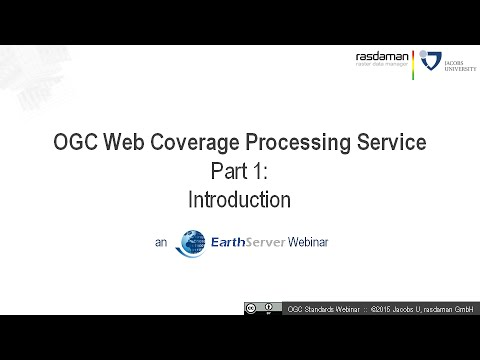

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('MnPABAAQnXM', width=700, height=400)

#### WCPS Webinar Part 2: Advanced Queries

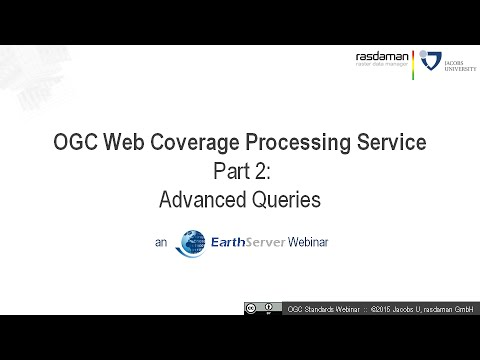

In [3]:
YouTubeVideo('m1q2AIoQADs', width=700, height=400)

***

&copy; 2017 ECMWF

This software is licensed under the terms of the Apache Licence Version 2.0 which can be obtained at http://www.apache.org/licenses/LICENSE-2.0. In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor
does it submit to any jurisdiction.